# Análise e Transformação de Dados @ DEI-FCTUC
## Uma resolução dos exercícios da Ficha Prática nº 1 usando Python
### Autoria: Alberto Cardoso ©DEI2021/2022

Objetivo: Pretende-se adquirir competências de programação em Python *(módulos: numpy, sympy, matplotlib.pyplot, mpl_toolkits.mplot3d)*.

### Exercícios:

<strong>Exercício 1.</strong> Considere a matriz A:
<br/><br/>
$A = \begin{bmatrix}
1 & 2 & 3 & 4\\
5 & 6 & 7 & 8
\end{bmatrix} $

1.1 Defina a matriz A no Workspace do MATLAB (ou em Python).


In [1]:
import numpy as np
A=np.array([[1, 2, 3, 4], [5, 6, 7, 8]])  # definição da matriz A
print(A)

[[1 2 3 4]
 [5 6 7 8]]


1.2. Defina uma matriz B com as mesmas dimensões de A, com valores inteiros aleatórios entre 2 e 9, seguindo uma distribuição uniforme.

In [2]:
B=np.random.randint(2,10,A.shape)
print(B)

[[7 4 4 3]
 [5 6 5 5]]


1.3.	Guarde as duas matrizes num ficheiro .mat de nome abfile.mat. (Apenas em MATLAB)

1.4.	Limpe o Workspace do MATLAB. (Apenas em MATLAB)

1.5.	Carregue as matrizes armazenadas no ficheiro abfile.mat. (Apenas em MATLAB)

1.6. Elimine a segunda coluna de A e a terceira coluna de B.

In [3]:
A=np.delete(A,1,1)
print(A)
B=np.delete(B,2,1)
print(B)

[[1 3 4]
 [5 7 8]]
[[7 4 3]
 [5 6 5]]


1.7.	Concatene a matriz coluna $C_A=\begin{bmatrix} 10 \\ 30 \end{bmatrix}$ no início de A e a matriz coluna   $C_B=\begin{bmatrix} 20 \\ 50 \end{bmatrix}$ no final da matriz B.

In [4]:
CA=np.array([[10], [30]])
CB=np.array([[20], [50]])
A=np.append(CA,A,1)
print(A)
B=np.append(B,CB,1)
print(B)

[[10  1  3  4]
 [30  5  7  8]]
[[ 7  4  3 20]
 [ 5  6  5 50]]


1.8.	Obtenha a matriz Cp que é formada pela primeira linha de A e pela última linha de B.

In [5]:
Cp=np.concatenate(([A[0]],[B[-1]]),0)
print(Cp)

[[10  1  3  4]
 [ 5  6  5 50]]


1.9.	Crie uma matriz C a partir da:

1.9.1.	Soma de A e B;

1.9.2.	Subtração de B a A;

1.9.3.	Multiplicação de A pela transposta de B;

1.9.4.	Multiplicação elemento a elemento de A e B;

1.9.5.	Divisão à direita de A e B;

1.9.6.	Divisão à direita elemento a elemento de A e B.

In [6]:
C=A+B
print(C)
C=A-B
print(C)
C=np.dot(A,B.T)
print(C)
C=A*B
print(C)
C=np.dot(A,np.linalg.pinv(B))
print(C)
C=A/B
print(C)

[[17  5  6 24]
 [35 11 12 58]]
[[  3  -3   0 -16]
 [ 25  -1   2 -42]]
[[163 271]
 [411 615]]
[[ 70   4   9  80]
 [150  30  35 400]]
[[ 1.80478088 -0.64475432]
 [ 5.56573705 -2.07370518]]
[[1.42857143 0.25       1.         0.2       ]
 [6.         0.83333333 1.4        0.16      ]]


<strong>Exercício 2.</strong> Considere a seguinte função dependente do tempo $f(t) = \sin(2\pi t) + \sin(\pi t)$.

2.1.	Crie um vetor tempo t que permita obter valores para $f(t)$ entre -10 e 10 segundos. Considere uma diferença de 0.01s entre valores do vetor tempo. Indique a dimensão do vetor tempo.

2.2.	Represente graficamente a evolução de $f(t)$ em função do tempo.

Dimensão do vetor tempo:
2001


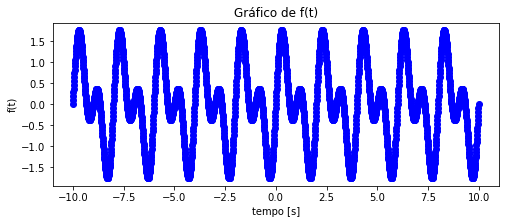

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

t=np.arange(-10,10.01,0.01)
print(u'Dimensão do vetor tempo:')
print(len(t))

f=np.sin(2*np.pi*t)+np.sin(np.pi*t)

plt.figure(figsize=(8,3))
plt.plot(t,f,'-ob')
plt.xlabel('tempo [s]')
plt.ylabel('f(t)')
plt.title(u'Gráfico de f(t)')
plt.show()

<strong>Exercício 3.</strong> Realize o exercício 2, mas recorrendo a cálculo matemático simbólico.

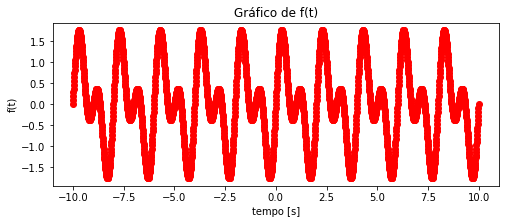

In [8]:
import sympy as sp
import matplotlib.pyplot as plt

t=sp.symbols('t')
ft=sp.sin(2*sp.pi*t)+sp.sin(sp.pi*t)

tt=np.arange(-10,10.01,0.01)
f=sp.lambdify(t,ft,"numpy")
f1=f(tt)

plt.figure(figsize=(8,3))
plt.plot(tt,f1,'-or')
plt.xlabel('tempo [s]')
plt.ylabel('f(t)')
plt.title(u'Gráfico de f(t)')
plt.show()

<strong>Exercício 4.</strong> Crie um script para representar graficamente a função $f(x,y) = \sin(x y) + \cos(x)$ recorrendo a cálculo numérico e a cálculo simbólico.

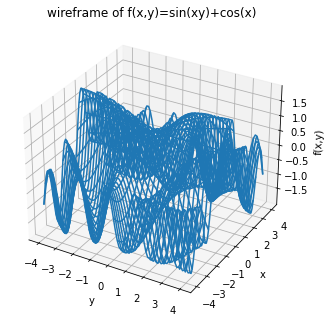

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()       # cria figura para visualização 3D

ax = fig.add_axes([1,1,1,1],projection='3d')

x=np.arange(-4,4.1,0.1)  # Definição do domínio de x e de y
y=np.arange(-4,4.1,0.1)

X,Y=np.meshgrid(x,y)   # Produz as coordenadas duma grelha retangular (X,Y)

Z=np.sin(np.multiply(X,Y))+np.cos(X)   # Calcula f(x,y)

ax.plot_wireframe(Y,X,Z) # Representação gráfica usando a função wireframe
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_zlabel('f(x,y)')
ax.set_title('wireframe of f(x,y)=sin(xy)+cos(x)')
plt.show()

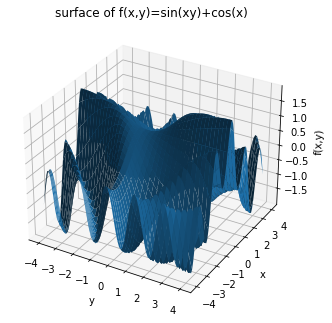

In [10]:
fig = plt.figure()       # cria figura para visualização 3D
ax = fig.add_axes([1,1,1,1],projection='3d')

ax.plot_surface(Y,X,Z) # Representação gráfica usando a função surface
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_zlabel('f(x,y)')
ax.set_title('surface of f(x,y)=sin(xy)+cos(x)')
plt.show()

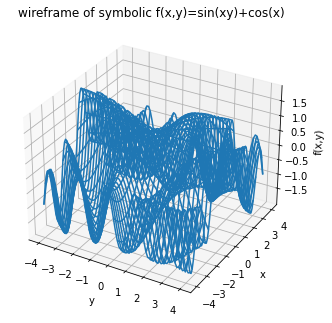

In [11]:
import sympy as sp

x=sp.symbols('x')           # variáveis simbólicas
y=sp.symbols('y')

fxy=sp.sin(x*y)+sp.cos(x)   # função simbólica

fn=sp.lambdify((x,y),fxy,"numpy")

xn=np.arange(-4,4.1,0.1)  # Definição do domínio de x e de y
yn=np.arange(-4,4.1,0.1)

X,Y=np.meshgrid(xn,yn)   # Produz as coordenadas duma grelha retangular (X,Y)

Z=fn(X,Y)   # Calcula f(x,y)

fig = plt.figure()       # cria figura para visualização 3D
ax = fig.add_axes([1,1,1,1],projection='3d')

ax.plot_wireframe(Y,X,Z) # Representação gráfica usando a função wireframe
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_zlabel('f(x,y)')
ax.set_title('wireframe of symbolic f(x,y)=sin(xy)+cos(x)')
plt.show()

<strong>Exercício 5.</strong> Crie um script para encontrar os coeficientes de um polinómio de grau 2 que se ajusta a uma dada série temporal, pelo método dos mínimos quadrados, e para representar graficamente, no mesmo gráfico, os dados originais e o resultado do ajuste. Considere que a série temporal é definida para um intervalo de tempo de 0 a 10 segundos (passo de 1s) com os seguintes valores:
$y = \begin{bmatrix}
0 & 0.7 & 2.4 & 3.1 & 4.2 & 4.8 & 5.7 & 5.9 & 6.2 & 6.4 & 6.3
\end{bmatrix} $.

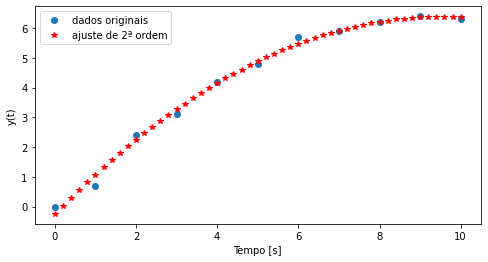

In [12]:
t=np.arange(11.0)          #intervalo temporal
y=np.array([0,0.7,2.4,3.1,4.2,4.8,5.7,5.9,6.2,6.4,6.3])  # série temporal
p=np.polyfit(t,y,2)        # coeficientes do polinómo de 2º grau
t2=np.arange(0,10.2,0.2)   # intervalo temporal com passo inferior
ye=np.polyval(p,t2)        # série temporal estimada

plt.figure(figsize=(8,4))
plt.plot(t,y,'o',label='dados originais')  # representação gráfica do resultado
plt.plot(t2,ye,'*r',label='ajuste de 2ª ordem')
plt.xlabel('Tempo [s]')
plt.ylabel('y(t)')
plt.legend(loc='upper left')
plt.show()

<strong>Exercício 6.</strong> Desenvolva uma função não recursiva que calcule o fatorial de um número.

In [13]:
def fatorial(n):      # função não recursiva para calcular o fatorial de um número
    fact=1
    for i in range(2,n+1):
        fact=fact*i
    return fact

In [14]:
n=11                        # número a considerar
fact=1
for i in range(2,n+1):      # cálculo do fatorial de forma não recursiva
    fact=fact*i

print('Fatorial de ' + str(n) + ':')
print(fact)                 # usando o resultdo neste script
print(fatorial(n))          # usando a função não recursiva
print(np.math.factorial(n)) # usando a função do Numpy.math

Fatorial de 11:
39916800
39916800
39916800


<strong>Exercício 7.</strong> Desenvolva uma função não recursiva que calcule os primeiros N números da série de Fibonacci.

In [15]:
def fib_series(N):   # função não recursiva
    fib=list()
    if N==1:
        fib.append(0)
    else:
        fib.append(0)
        fib.append(1);
        for i in range(2,N):
            fib.append(fib[i-1]+fib[i-2]);
    return fib

In [16]:
print(fib_series(7))    # exemplo de cálculo dos primeiros números da série de Fibonacci

[0, 1, 1, 2, 3, 5, 8]


<strong>Exercício 8.</strong> O modelo de Nicholson–Bailey foi criado para simular a coevolução de duas populações, uma de hospedeiros e outra de parasitas. O modelo é baseado em equações de diferença que descrevem o crescimento de ambas as populações. Mais concretamente, o modelo assume que os parasitas procuram hospedeiros de forma aleatória e que ambos (parasitas e hospedeiros) se encontram distribuídos de forma não contígua no espaço. Matematicamente o modelo é descrito por:

$H_{g+1}=kH_ge^{-aP_g}$

$P_{g+1}=cH_g(1-e^{-aP_g})$

Nas equações anteriores $H_g$ e $P_g$ representam o tamanho da população de hospedeiros e da
população de parasitas na geração $g$, respetivamente, sendo $g$ definido de 0 a N. $k$ representa a taxa de reprodução dos hospedeiros, $c$ representa o número médio de ovos viáveis depositados pelos parasitas num único hospedeiro, e $a$ representa a probabilidade de um determinado parasita encontrar um hospedeiro durante a sua vida.

<strong>8.1</strong> Desenvolva uma função que permita simular a evolução de ambas as populações.

In [17]:
def sim_evolucao(a,k,c,N,H0,P0):
    # a - probabilidade de um determinado parasita encontrar 
    #     um hospedeiro durante a sua vida
    # k - taxa de reprodução dos hospedeiros
    # c - número médio de ovos viáveis depositados pelos parasitas
    #     num único hospedeiro
    # N - número de gerações
    # H0 - tamanho inicial da população de hospedeiros
    # P0 - tamanho inicial da população de parasitas

    H_g=H0
    P_g=P0

    H=[H0]           # vetor da população de hospedeiros
    P=[P0]           # vetor da população de parasitas

    for i in range(1,N+1):         # simulação do modelo
        H_g_1 = k*H_g*np.exp(-a*P_g)
        P_g_1 = c*H_g*(1-np.exp(-a*P_g))
        H_g = H_g_1
        P_g = P_g_1
        H.append(H_g)
        P.append(P_g)
    return H,P

<strong>8.2</strong> Desenvolva também um script que chame a função desenvolvida e represente graficamente a evolução de ambas as populações, considerando, por exemplo, os seguintes casos:

<strong>8.2.1</strong> $a=0.025; k=1.0; c=2; N=30; H_0=20; P_0=10$

<strong>8.2.2</strong> $a=0.025; k=1.5; c=2; N=30; H_0=20; P_0=10$

<strong>8.2.3</strong> $a=0.025; k=1.5; c=2; N=30; H_0=15; P_0=10$

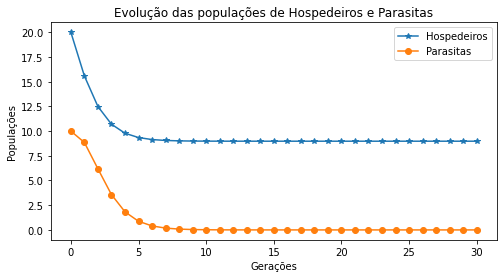

In [18]:
N=30      # número de gerações
H,P=sim_evolucao(0.025,1.0,2,N,20,10)  # 8.2.1
plt.figure(figsize=(8,4))
plt.plot(range(0,N+1),H,'-*',label='Hospedeiros')  # representação gráfica do resultado
plt.plot(range(0,N+1),P,'-o',label='Parasitas')
plt.xlabel('Gerações')
plt.ylabel('Populações')
plt.title('Evolução das populações de Hospedeiros e Parasitas')
plt.legend()
plt.show()

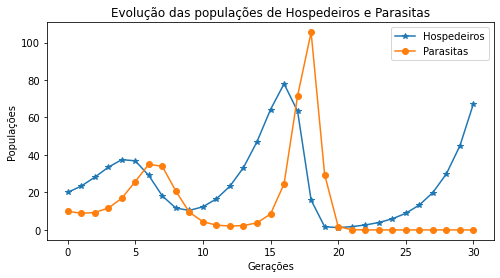

In [19]:
N=30      # número de gerações
H,P=sim_evolucao(0.025,1.5,2,N,20,10)  # 8.2.2
plt.figure(figsize=(8,4))
plt.plot(range(0,N+1),H,'-*',label='Hospedeiros')  # representação gráfica do resultado
plt.plot(range(0,N+1),P,'-o',label='Parasitas')
plt.xlabel('Gerações')
plt.ylabel('Populações')
plt.title('Evolução das populações de Hospedeiros e Parasitas')
plt.legend()
plt.show()

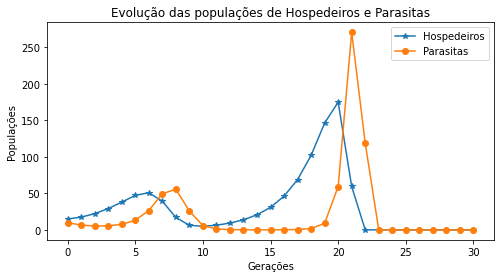

In [20]:
N=30      # número de gerações
H,P=sim_evolucao(0.025,1.5,2,N,15,10)  # 8.2.3
plt.figure(figsize=(8,4))
plt.plot(range(0,N+1),H,'-*',label='Hospedeiros')  # representação gráfica do resultado
plt.plot(range(0,N+1),P,'-o',label='Parasitas')
plt.xlabel('Gerações')
plt.ylabel('Populações')
plt.title('Evolução das populações de Hospedeiros e Parasitas')
plt.legend()
plt.show()